In [ ]:
# !pip install scispacy
# !pip install spacy
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_ner_bc5cdr_md-0.2.5.tar.gz

In [1]:
import sys
sys.path.append("../")

from collections import defaultdict
import os

# Custom module imports
from ehr import HealthRecord
import utils

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Spacy imports
import scispacy
from spacy import displacy
import en_ner_bc5cdr_md

In [2]:
DATA_DIR = '../data/'

# Get all the file IDs
file_ids = sorted(list(set(['.'.join(fname.split('.')[:-1]) for fname in os.listdir(DATA_DIR)])))

### EDA

In [3]:
tags = []
data = []

for fid in file_ids:
    record = HealthRecord(fid, text_path = DATA_DIR + fid + '.txt', 
                          ann_path = DATA_DIR + fid + '.ann')
    tags.append(record.get_annotations())
    data.append(record)

/home/smit/Projects/ehr-relation-extraction/ehr.py:168: UserWarning: Invalid annotation encountered: ['#1', 'AnnotatorNotes T35', 'likely a med that got mistook for a name']
  warnings.warn("Invalid annotation encountered: " + str(line))
/home/smit/Projects/ehr-relation-extraction/ehr.py:168: UserWarning: Invalid annotation encountered: ['#1', 'AnnotatorNotes T178', 'drug name changed out in error']
  warnings.warn("Invalid annotation encountered: " + str(line))


In [4]:
# Entity example
data[0].entities['T1']


ID: T1
Entity name: Reason
Character range: 10179 10197
Entity text: recurrent seizures

In [5]:
# Relation example
data[0].relations['R1']


ID: R1
Relation type: Reason-Drug

Entity 1: 

ID: T1
Entity name: Reason
Character range: 10179 10197
Entity text: recurrent seizures

Entity 2: 

ID: T3
Entity name: Drug
Character range: 10227 10233
Entity text: ativan

In [6]:
# Getting counts for different entities
entity_counts = defaultdict(int)

for entity_dict in tags:
    for key, value in entity_dict['entities'].items():
        entity_counts[value.name] += 1
        
# Convert defaultdict to dict
entity_counts = dict(entity_counts)

# Sort by value
entity_counts = {key: value for key, value in sorted(entity_counts.items(), 
                                                     key = lambda x: x[1], 
                                                     reverse = True)}

In [7]:
# Gettings counts for different relations
relation_counts = defaultdict(int)

for entity_dict in tags:
    for key, value in entity_dict['relations'].items():
        relation_counts[value.name] += 1
        
# Convert defaultdict to dict
relation_counts = dict(relation_counts)

# Sort by value
relation_counts = {key: value for key, value in sorted(relation_counts.items(), 
                                                       key = lambda x: x[1],
                                                       reverse = True)}

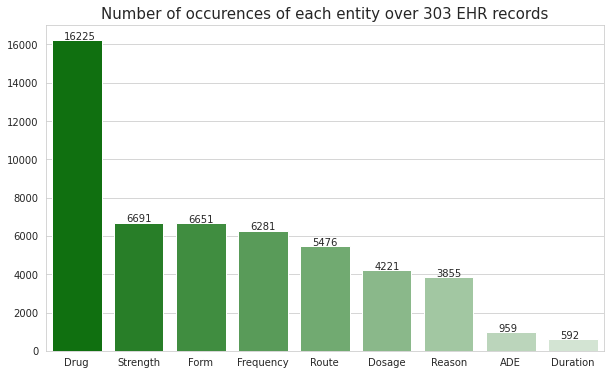

In [8]:
plt.figure(figsize = (10, 6))

sns.barplot(x = list(entity_counts.keys()), y = list(entity_counts.values()), 
            palette = sns.light_palette("green", n_colors = 10, reverse = True))

# Annotating counts
for i in range(len(entity_counts.values())):
    plt.text(x = i - 0.2, y = list(entity_counts.values())[i] + 40, 
             s = list(entity_counts.values())[i])
    
# Setting plot title
plt.title('Number of occurences of each entity over 303 EHR records', fontsize = 15)
plt.savefig('../plots/entity_counts.jpg')
plt.show()

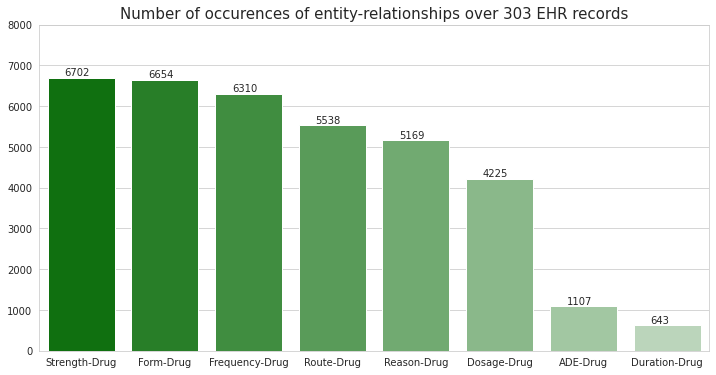

In [9]:
plt.figure(figsize = (12, 6))

sns.barplot(x = list(relation_counts.keys()), y = list(relation_counts.values()), 
            palette = sns.light_palette("green", n_colors = 10, reverse = True))

plt.ylim(0, 8000)

# Annotating counts
for i in range(len(relation_counts.values())):
    plt.text(x = i - 0.2, y = list(relation_counts.values())[i] + 40, 
             s = list(relation_counts.values())[i])
    
# Setting plot title
plt.title('Number of occurences of entity-relationships over 303 EHR records', fontsize = 15)
plt.savefig('../plots/relation_counts.jpg')
plt.show()

### Scispacy

In [10]:
nlp = en_ner_bc5cdr_md.load()

In [11]:
doc = nlp(data[0].text)

colors = {"DISEASE":"#D7BDE2", "CHEMICAL":"#F9E79F"}
options = {"ents":["DISEASE", "CHEMICAL"], "colors":colors}
displacy.render(doc, style = "ent", jupyter=True, options = options)

### Custom-built entity highlighter

In [12]:
utils.display_ehr(data[0].text, data[0].get_entities())